In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [3]:
# importing data analysis, graph libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading train and test data and concat them.
# We are adding train and test data because a model can predict with same featues which we use train the model.
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

titanic_df = train_df.append(test_df, ignore_index=True, sort=False)

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1 - Step: Feature Engineering and Data Analysis
### We will analyze the data and try to generate some new features and clean some feature columns.

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1 - PassengerId:

In [7]:
# PassengerId is a irrelevant column with our dataset so will remove this column.

titanic_df.drop('PassengerId', axis=1, inplace=True)

In [8]:
titanic_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 2 - Pclass:

In [9]:
# checking whether it has missing values or not.
titanic_df['Pclass'].isnull().sum()

0

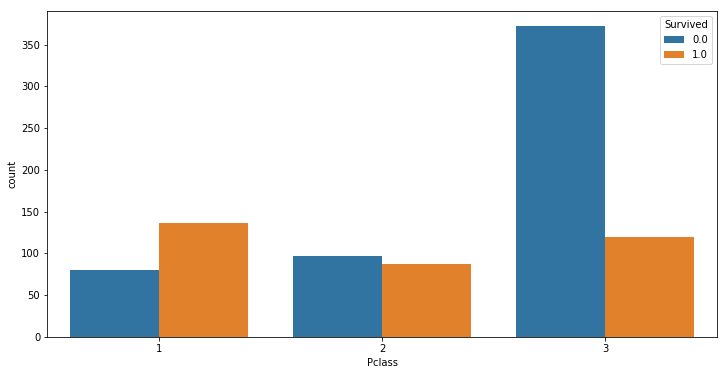

In [10]:
plt.figure(figsize=(12, 6)) # setting figure size.

sns.countplot(x='Pclass', data=titanic_df, hue='Survived')

In [11]:
# For Pclass column we will leave same for now maybe with other columns we can create some new features.

## 3 - Name:

In [12]:
titanic_df['Name'].isnull().sum()

0

In [13]:
titanic_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [14]:
# For name column we will split the names and look the name titles.

In [15]:
def find_title(name):
    """
    This method takes a full name 
    and return the title of name
    
    """
    
    nameList = name.split()
    
    for i in nameList:
        if '.' in i:
            name = i[:-1]
    
    return name

In [16]:
# creating a new title column in titanic_df
titanic_df['Title'] = titanic_df['Name'].apply(find_title) 

In [17]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


(0, 500)

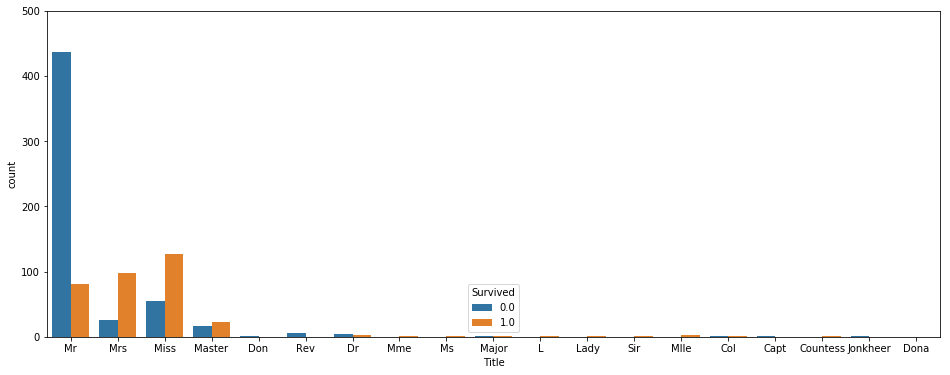

In [18]:
plt.figure(figsize=(16, 6)) # setting figure size.

sns.countplot(x='Title', data=titanic_df, hue='Survived')

plt.ylim(0, 500)

In [19]:
# In the graph we see that ['Mme', 'Ms', 'L', 'Lady', 'Sir', 'Mlle', 'Countess'] all survived.
# Also ['Don', 'Rev', 'Capt', 'Jonkheer'] all died.
# ['Mrs', 'Miss'] have similar ratio.
# So we will create 6 class for title:

# 1 - ['Mme', 'Ms', 'L', 'Lady', 'Sir', 'Mlle', 'Countess']
# 2 - ['Don', 'Rev', 'Capt', 'Jonkheer']
# 3 - ['Mrs', 'Miss']
# 4 - Master
# 5 - Mr
# 6 - Others

In [20]:
def title_class(title):
    
    if title in ['L', 'Lady', 'Sir', 'Countess', 'Mme', 'Mlle', 'Ms']:
        return 0
    elif title in ['Don', 'Rev', 'Capt', 'Jonkheer']:
        return 1
    elif title in ['Mrs', 'Miss']:
        return 2
    elif title in ['Master']:
        return 3
    elif title in ['Mr']:
        return 5
    else:
        return 6

In [21]:
titanic_df['Title'] = titanic_df['Title'].apply(title_class)

In [22]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,5
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5


In [23]:
# Now we don't need the name column anymore.
titanic_df.drop('Name', axis=1, inplace=True)

## 4 - Sex:

In [24]:
titanic_df['Sex'].isnull().sum()

0

In [25]:
def sex_column(sex):
    
    if sex == 'male':
        return 0
    else:
        return 1

In [26]:
titanic_df['Sex'] = titanic_df['Sex'].apply(sex_column)

In [27]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,5
1,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1.0,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,0.0,3,0,35.0,0,0,373450,8.0500,NaN,S,5


## 5 - Age:

In [28]:
titanic_df['Age'].isnull().sum()

263

In [29]:
# We have a lot of missing values. So first we have to fill these missing values.
# We can find relevant feature columns in age column and give some random age values for missing ages.

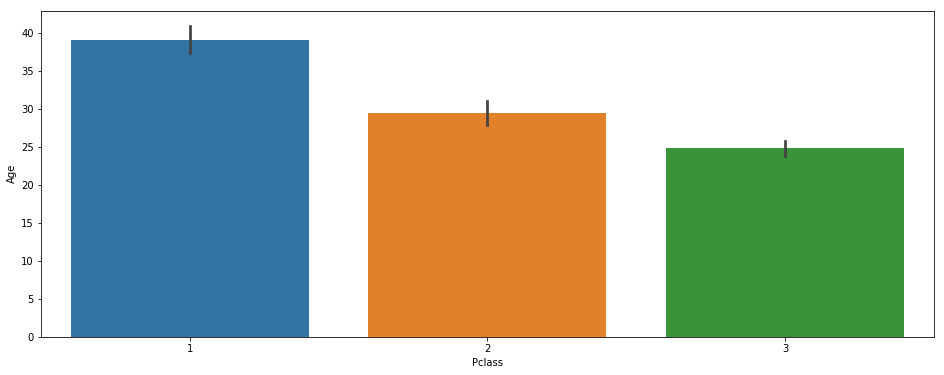

In [30]:
plt.figure(figsize=(16, 6)) # setting figure size.

sns.barplot(x='Pclass', y='Age', data=titanic_df)

In [31]:
titanic_df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [32]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].describe()

count    284.000000
mean      39.159930
std       14.548028
min        0.920000
25%       28.000000
50%       39.000000
75%       50.000000
max       80.000000
Name: Age, dtype: float64

In [33]:
titanic_df[titanic_df['Pclass'] == 2]['Age'].describe()

count    261.000000
mean      29.506705
std       13.638627
min        0.670000
25%       22.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

In [34]:
titanic_df[titanic_df['Pclass'] == 3]['Age'].describe()

count    501.000000
mean      24.816367
std       11.958202
min        0.170000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64

In [35]:
# Pclass is a option for predicting Age Column.

In [36]:
# We can scale the fare column and analyze relationship with age.

In [37]:
def fare_class(fare):
    return fare // 200

In [38]:
titanic_df['FareClass'] = titanic_df['Fare'].apply(fare_class)

In [39]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareClass
0,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,5,0.0
1,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,0.0
2,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.0
3,1.0,1,1,35.0,1,0,113803,53.1000,C123,S,2,0.0
4,0.0,3,0,35.0,0,0,373450,8.0500,NaN,S,5,0.0


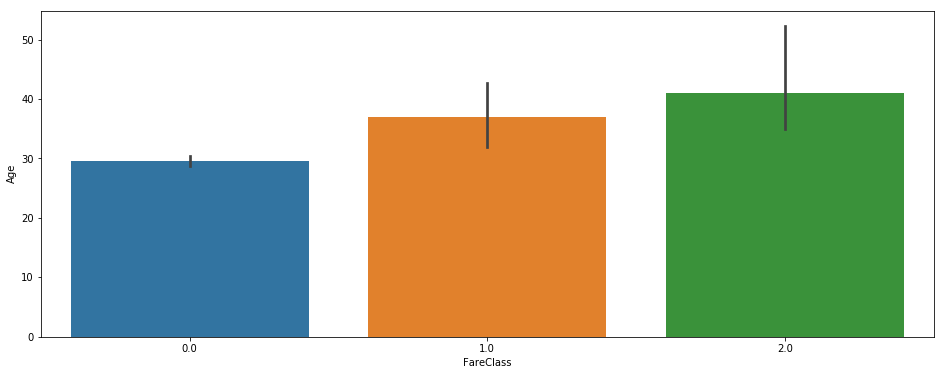

In [40]:
plt.figure(figsize=(16, 6)) # setting figure size.

sns.barplot(x='FareClass', y='Age', data=titanic_df)

In [41]:
# We can use both FareClass and Pclass to fill missing age values.
# FareClass 2 means Pclass 1 
# FareClass 1 means Pclass 2 
# FareClass 0 means Pclass 3 

In [42]:
import random

def fill_age(columns):
    
    age = columns[0]
    pclass = columns[1]
    fareclass = columns[2]
        
    if pd.isnull(age):
        pclass_mean = int(round(titanic_df[titanic_df['Pclass'] == pclass]['Age'].mean()))
        fareclass_mean = int(round(titanic_df[titanic_df['FareClass'] == fareclass]['Age'].mean()))

        pclass_std = int(round(titanic_df[titanic_df['Pclass'] == pclass]['Age'].std()))
        fareclass_std = int(round(titanic_df[titanic_df['FareClass'] == fareclass]['Age'].std()))

        age_max = int(round(((pclass_mean + fareclass_mean) + (pclass_std + fareclass_std))/2))
        age_min = int(round(((pclass_mean + fareclass_mean) - (pclass_std + fareclass_std))/2))

        random_age = random.randint(age_min, age_max)
        return random_age
    else:
        return age

In [43]:
titanic_df['Age'] = titanic_df[['Age', 'Pclass', 'FareClass']].apply(fill_age, axis=1)

In [44]:
titanic_df['Age'].isnull().sum()

0

In [45]:
titanic_df['Age'] = titanic_df['Age'].apply(int)

In [46]:
# We may create an age_class like 0-20, 21-40, 40-others

In [47]:
def age_class(age):
    
    if 0 <= age <= 20:
        return 0
    elif 20 < age <= 40:
        return 1
    elif 40 < age <= 60:
        return 2
    else:
        return 3

In [48]:
titanic_df['AgeClass'] = titanic_df['Age'].apply(age_class)

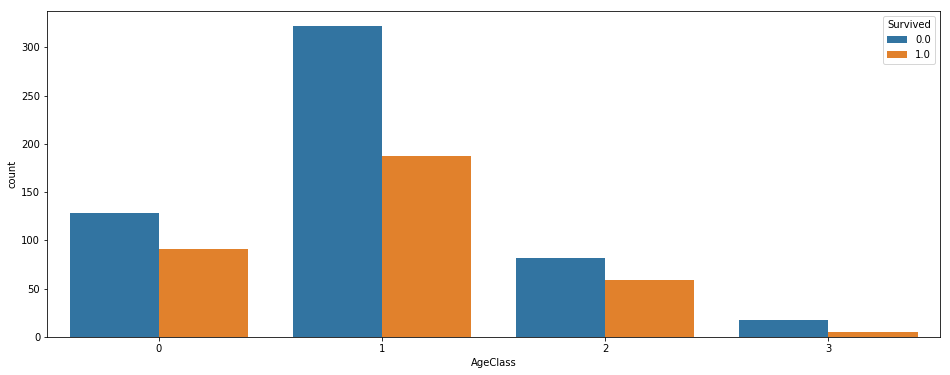

In [49]:
plt.figure(figsize=(16, 6)) # setting figure size.

sns.countplot(x='AgeClass', data=titanic_df, hue='Survived')

In [50]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareClass,AgeClass
0,0.0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,5,0.0,1
1,1.0,1,1,38,1,0,PC 17599,71.2833,C85,C,2,0.0,1
2,1.0,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.0,1
3,1.0,1,1,35,1,0,113803,53.1000,C123,S,2,0.0,1
4,0.0,3,0,35,0,0,373450,8.0500,NaN,S,5,0.0,1


## 6 - SibSp and Parch:

In [51]:
titanic_df['SibSp'].isnull().sum()

0

In [52]:
titanic_df['Parch'].isnull().sum()

0

In [53]:
# We can use these columns to create family size column.
# We can create a column which is passenger alone or not.

In [54]:
# We have to add 1 because we have to include passenger too.
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [55]:
def alone(familysize):
    
    if familysize == 1:
        return 1
    else:
        return 0

In [56]:
titanic_df['Alone'] = titanic_df['FamilySize'].apply(alone)

In [57]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareClass,AgeClass,FamilySize,Alone
0,0.0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,5,0.0,1,2,0
1,1.0,1,1,38,1,0,PC 17599,71.2833,C85,C,2,0.0,1,2,0
2,1.0,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.0,1,1,1
3,1.0,1,1,35,1,0,113803,53.1000,C123,S,2,0.0,1,2,0
4,0.0,3,0,35,0,0,373450,8.0500,NaN,S,5,0.0,1,1,1


In [58]:
sizes = titanic_df['FamilySize'].unique() # unique familysize values.
sizes

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [59]:
# We can classify the familysize as small medium and big.

In [60]:
(max(sizes) - min(sizes)) / 3

3.3333333333333335

In [61]:
def family_class(familysize):
    
    if familysize <= 3:
        return 0
    elif 3 < familysize <= 7:
        return 1
    else:
        return 2

In [62]:
titanic_df['FamilyClass'] = titanic_df['FamilySize'].apply(family_class)

In [63]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareClass,AgeClass,FamilySize,Alone,FamilyClass
0,0.0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,5,0.0,1,2,0,0
1,1.0,1,1,38,1,0,PC 17599,71.2833,C85,C,2,0.0,1,2,0,0
2,1.0,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.0,1,1,1,0
3,1.0,1,1,35,1,0,113803,53.1000,C123,S,2,0.0,1,2,0,0
4,0.0,3,0,35,0,0,373450,8.0500,NaN,S,5,0.0,1,1,1,0


## 7 - Ticket:

In [64]:
titanic_df['Ticket'].isnull().sum()

0

In [65]:
tickets = titanic_df['Ticket'].unique()

In [66]:
# We can split ticket as digit and non digit tickets.
# We may use the first letter inside tickets.

In [67]:
tickets_int = list()
tickets_str = list()

for i in range(len(tickets)):
    try:
        tickets_int.append(int(tickets[i]))
    except:
        tickets_str.append(tickets[i])

In [68]:
def ticket_class(ticket):
    
    try:
        int(ticket)
        return 0
    except:
        return 1

In [69]:
titanic_df['TicketClass'] = titanic_df['Ticket'].apply(ticket_class)

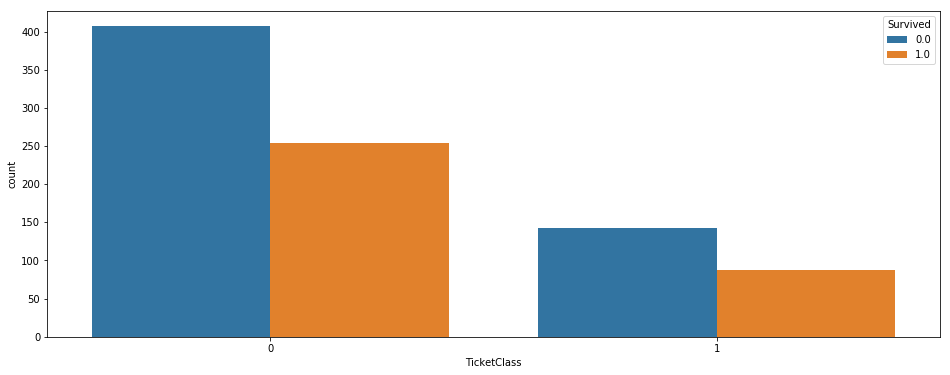

In [70]:
plt.figure(figsize=(16, 6)) # setting figure size.

sns.countplot(x='TicketClass', data=titanic_df, hue='Survived')

In [71]:
titanic_df.drop('Ticket', axis=1, inplace=True)

In [72]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FareClass,AgeClass,FamilySize,Alone,FamilyClass,TicketClass
0,0.0,3,0,22,1,0,7.2500,NaN,S,5,0.0,1,2,0,0,1
1,1.0,1,1,38,1,0,71.2833,C85,C,2,0.0,1,2,0,0,1
2,1.0,3,1,26,0,0,7.9250,NaN,S,2,0.0,1,1,1,0,1
3,1.0,1,1,35,1,0,53.1000,C123,S,2,0.0,1,2,0,0,0
4,0.0,3,0,35,0,0,8.0500,NaN,S,5,0.0,1,1,1,0,0


## 8 - Fare:

In [73]:
# We have already created fareclass just we can make them integer values
titanic_df['Fare'].isnull().sum()

1

In [74]:
titanic_df[titanic_df['Fare'].isnull() == True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FareClass,AgeClass,FamilySize,Alone,FamilyClass,TicketClass
1043,NaN,3,0,60,0,0,NaN,NaN,S,5,NaN,2,1,1,0,0


In [75]:
pclass_mean = int(round(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean()))
pclass_std = int(round(titanic_df[titanic_df['Pclass'] == 3]['Fare'].std()))

fare_min = pclass_mean - pclass_std
fare_max = pclass_mean + pclass_std

random_fare = random.randint(fare_min, fare_max)

titanic_df.loc[titanic_df['Fare'].isnull() == True, 'Fare'] = random_fare

In [76]:
titanic_df['Fare'].isnull().sum()

0

In [77]:
titanic_df['FareClass'].isnull().sum()

1

In [78]:
titanic_df.loc[titanic_df['FareClass'].isnull() == True, 'FareClass'] = random_fare // 200

In [79]:
titanic_df['FareClass'].isnull().sum()

0

In [80]:
titanic_df['FareClass'] = titanic_df['FareClass'].apply(int)

In [81]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FareClass,AgeClass,FamilySize,Alone,FamilyClass,TicketClass
0,0.0,3,0,22,1,0,7.2500,NaN,S,5,0,1,2,0,0,1
1,1.0,1,1,38,1,0,71.2833,C85,C,2,0,1,2,0,0,1
2,1.0,3,1,26,0,0,7.9250,NaN,S,2,0,1,1,1,0,1
3,1.0,1,1,35,1,0,53.1000,C123,S,2,0,1,2,0,0,0
4,0.0,3,0,35,0,0,8.0500,NaN,S,5,0,1,1,1,0,0


## 9 - Cabin:

In [82]:
titanic_df['Cabin'].isnull().sum()

1014

In [83]:
# There are too many missing cabin values that's why I will not use cabin column.

In [84]:
titanic_df.drop('Cabin', axis=1, inplace=True)

In [85]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareClass,AgeClass,FamilySize,Alone,FamilyClass,TicketClass
0,0.0,3,0,22,1,0,7.2500,S,5,0,1,2,0,0,1
1,1.0,1,1,38,1,0,71.2833,C,2,0,1,2,0,0,1
2,1.0,3,1,26,0,0,7.9250,S,2,0,1,1,1,0,1
3,1.0,1,1,35,1,0,53.1000,S,2,0,1,2,0,0,0
4,0.0,3,0,35,0,0,8.0500,S,5,0,1,1,1,0,0


## 10 - Embarked:

In [86]:
titanic_df['Embarked'].isnull().sum()

2

In [87]:
titanic_df[titanic_df['Embarked'].isnull() == True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareClass,AgeClass,FamilySize,Alone,FamilyClass,TicketClass
61,1.0,1,1,38,0,0,80.0,NaN,2,0,1,1,1,0,0
829,1.0,1,1,62,0,0,80.0,NaN,2,0,3,1,1,0,0


In [88]:
# I will give random Embarked for these NaN values with no reason.

In [89]:
titanic_df.loc[titanic_df['Embarked'].isnull() == True, 'Embarked'] = 'S'

In [90]:
def embarked(embarked):
    
    embarked_dict = {'S' : 0, 'C' : 1, 'Q' : 2}
    return embarked_dict[embarked]

In [91]:
titanic_df['Embarked'] = titanic_df['Embarked'].apply(embarked)

In [92]:
titanic_df['Embarked'].isnull().sum()

0

In [93]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareClass,AgeClass,FamilySize,Alone,FamilyClass,TicketClass
0,0.0,3,0,22,1,0,7.2500,0,5,0,1,2,0,0,1
1,1.0,1,1,38,1,0,71.2833,1,2,0,1,2,0,0,1
2,1.0,3,1,26,0,0,7.9250,0,2,0,1,1,1,0,1
3,1.0,1,1,35,1,0,53.1000,0,2,0,1,2,0,0,0
4,0.0,3,0,35,0,0,8.0500,0,5,0,1,1,1,0,0


In [94]:
# Now, We have a featured data set which occured from train and test dataset.
# We will separete train and test dataset and then we will train our algorithms.

In [95]:
train_featured = titanic_df.iloc[:891]
test_featued = titanic_df.iloc[891:]

train_featured_copy = train_featured
test_featued_copy = test_featued

# 2 - Step: Train Test Algorithm and Predict:

In [96]:
# First split our train data as train and test data to see accuract values.
# Sklearn has train_split for dividing dataset and shuffle it.
from sklearn.model_selection import train_test_split

train_df = train_featured_copy

X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
# Some algorithms from sklearn to classification. 
# Actually, I didn't use many algorithms because they are almost all will give similar result.
# Because, the important thing is create a good featured dataset. If we have a good classifiable dataset
# mostly all algorithm will give similar result.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [98]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
log_predictions = logmodel.predict(X_test)
print(classification_report(y_test, log_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       157
         1.0       0.76      0.72      0.74       111

   micro avg       0.79      0.79      0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [99]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78       157
         1.0       0.73      0.50      0.59       111

   micro avg       0.72      0.72      0.72       268
   macro avg       0.72      0.68      0.69       268
weighted avg       0.72      0.72      0.70       268



In [100]:
rdm = RandomForestClassifier()
rdm.fit(X_train, y_train)
rdm_predictions = rdm.predict(X_test)
print(classification_report(y_test, rdm_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       157
         1.0       0.80      0.70      0.75       111

   micro avg       0.80      0.80      0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [101]:
param_grid = {'C' : [1, 10, 100, 1000, 10000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       157
         1.0       0.75      0.71      0.73       111

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [102]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       157
         1.0       0.85      0.68      0.76       111

   micro avg       0.82      0.82      0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [103]:
import itertools
import time

start = time.time()

y = train_df['Survived']
columns = list(train_df.columns)
columns.remove('Survived')

for k in range(0, len(columns)-6):
    
    features = list(itertools.combinations(columns, k))

    score_max = 0
    score_index = list()

    for i in range(len(features)):

        features_extra = list(features[i])
        features_extra.append('Survived')
        
        X = train_df.drop(features_extra, axis=1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        #logmodel = LogisticRegression()
        #logmodel.fit(X_train, y_train)
        #log_predictions = logmodel.predict(X_test)

        #svm_model = SVC()
        #svm_model.fit(X_train, y_train)
        #svm_predictions = svm_model.predict(X_test)

        #rdm = RandomForestClassifier()
        #rdm.fit(X_train, y_train)
        #rdm_predictions = rdm.predict(X_test)

        gbc = GradientBoostingClassifier()
        gbc.fit(X_train, y_train)
        gbc_predictions = gbc.predict(X_test)

        scores = dict()

        #scores[accuracy_score(y_test, log_predictions)] = "Logistic Regression: "
        #scores[accuracy_score(y_test, svm_predictions)] = "SVM: "
        #scores[accuracy_score(y_test, rdm_predictions)] = "Random Forest Classifier: "
        scores[accuracy_score(y_test, gbc_predictions)] = "GradientBoosting Classifier: "

        sorted_scores = sorted(scores, reverse=True)

        if score_max < max(sorted_scores):
            score_index = list()
            score_index.append(max(score_max, max(sorted_scores)))
            score_index.append(i)
            score_max = max(score_max, max(sorted_scores))

        #print("------------------------------------Test", i, '---------------------------------')    
        #print()

        #for j in sorted_scores:
        #    print(scores[j], j)

        #print()

    print("------------------------------------ Extra Feature", k, '---------------------------------')
    print("Extra Feature Count: ",  k, "\nMax Score:", score_index[0], "\nFeatue Index: ", score_index[1])
    print()
    
end = time.time()
time_comb = end - start
print("Time for Combinations of Features: ", time_comb)

------------------------------------ Extra Feature 0 ---------------------------------
Extra Feature Count:  0 
Max Score: 0.8208955223880597 
Featue Index:  0

------------------------------------ Extra Feature 1 ---------------------------------
Extra Feature Count:  1 
Max Score: 0.832089552238806 
Featue Index:  3

------------------------------------ Extra Feature 2 ---------------------------------
Extra Feature Count:  2 
Max Score: 0.8395522388059702 
Featue Index:  66

------------------------------------ Extra Feature 3 ---------------------------------
Extra Feature Count:  3 
Max Score: 0.8432835820895522 
Featue Index:  155

------------------------------------ Extra Feature 4 ---------------------------------
Extra Feature Count:  4 
Max Score: 0.8507462686567164 
Featue Index:  507

------------------------------------ Extra Feature 5 ---------------------------------
Extra Feature Count:  5 
Max Score: 0.8507462686567164 
Featue Index:  111

----------------------------

In [104]:
# After I got some scores around 79-80 from algorithms. I thought, maybe I have some extra features 
# and I used bruce force to try exery combinations of extra features. 
# Because it takes long time I didn't use some algorithms above.
# The best score 0.8507462686567164 with 3 extra feature. Lets find these extra features.

In [143]:
features = list(itertools.combinations(columns, 7))
extra_features = list(features[611])
extra_features.append('Survived')

In [144]:
# Now, to be sure I will remove these features and get some scores again from algorithms.

In [145]:
train_df = train_df

X = train_df.drop(extra_features, axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [146]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
log_predictions = logmodel.predict(X_test)
print(classification_report(y_test, log_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       157
         1.0       0.76      0.73      0.75       111

   micro avg       0.79      0.79      0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [147]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

         0.0       0.70      0.89      0.78       157
         1.0       0.74      0.47      0.57       111

   micro avg       0.71      0.71      0.71       268
   macro avg       0.72      0.68      0.68       268
weighted avg       0.72      0.71      0.70       268



In [148]:
rdm = RandomForestClassifier()
rdm.fit(X_train, y_train)
rdm_predictions = rdm.predict(X_test)
print(classification_report(y_test, rdm_predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       157
         1.0       0.74      0.70      0.72       111

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.77      0.78      0.78       268



In [149]:
param_grid = {'C' : [1, 10, 100, 1000, 10000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       157
         1.0       0.74      0.74      0.74       111

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



In [150]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       157
         1.0       0.87      0.75      0.81       111

   micro avg       0.85      0.85      0.85       268
   macro avg       0.86      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



# Final Step:

In [113]:
train_df = train_df

X = train_df.drop(extra_features, axis=1)
y = train_df['Survived']

In [114]:
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [115]:
X_test = test_featued.drop(extra_features, axis=1)

gbc_predictions = gbc.predict(X_test)
gbc_predictions = pd.DataFrame(gbc_predictions, columns=['Survived'])

In [116]:
gbc_predictions['Survived'] = gbc_predictions['Survived'].apply(int)

In [117]:
gbc_predictions.set_index(test_df['PassengerId'], inplace=True)
gbc_predictions.to_csv('submission.csv')

In [118]:
data_df = pd.read_csv('submission.csv')